In [1]:
import csv
import datetime

In [2]:
with open('data/guns.csv') as guns_file:
    data = list(csv.reader(guns_file))
print data[:5]

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', 'BA+'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', 'Some college'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', 'BA+'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', 'BA+']]


In [3]:
headers = data[0]
data = data[1:]
print headers
print data[:5]


['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', 'BA+'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', 'Some college'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', 'BA+'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', 'BA+'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', 'HS/GED']]


In [14]:
def gds_by_yr(data):
    year_counts = {}
    for row in data:
        year = row[1]
        if year not in year_counts:
            year_counts[year] = 0
        year_counts[year] += 1
    return year_counts
gds_by_yr(data)

{'2012': 33563, '2013': 33636, '2014': 33599}

{datetime.datetime(2013, 8, 1, 0, 0): 2859, datetime.datetime(2014, 3, 1, 0, 0): 2684, datetime.datetime(2013, 4, 1, 0, 0): 2798, datetime.datetime(2014, 10, 1, 0, 0): 2865, datetime.datetime(2013, 10, 1, 0, 0): 2808, datetime.datetime(2013, 3, 1, 0, 0): 2862, datetime.datetime(2014, 12, 1, 0, 0): 2857, datetime.datetime(2014, 2, 1, 0, 0): 2361, datetime.datetime(2013, 9, 1, 0, 0): 2742, datetime.datetime(2013, 6, 1, 0, 0): 2920, datetime.datetime(2012, 3, 1, 0, 0): 2743, datetime.datetime(2013, 5, 1, 0, 0): 2806, datetime.datetime(2012, 12, 1, 0, 0): 2791, datetime.datetime(2014, 5, 1, 0, 0): 2864, datetime.datetime(2012, 2, 1, 0, 0): 2357, datetime.datetime(2014, 7, 1, 0, 0): 2884, datetime.datetime(2013, 11, 1, 0, 0): 2758, datetime.datetime(2014, 4, 1, 0, 0): 2862, datetime.datetime(2013, 7, 1, 0, 0): 3079, datetime.datetime(2012, 1, 1, 0, 0): 2758, datetime.datetime(2013, 12, 1, 0, 0): 2765, datetime.datetime(2012, 11, 1, 0, 0): 2729, datetime.datetime(2012, 7, 1, 0, 0): 3026, dat

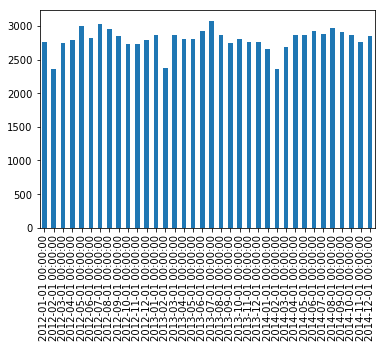

In [15]:
dates = [datetime.datetime(year=int(l[1]), month=int(l[2]), day=1) for l in data]
date_counts = {}
for date in dates:
    if date not in date_counts:
        date_counts[date] = 0
    date_counts[date] += 1
print date_counts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dates_series = pd.Series(date_counts)
dates_series.plot('bar')

In [18]:
def get_sex_counts(data):
    sex_counts = {'M':0,'F':0}
    for row in data:
        sex_counts[row[5]] += 1
    return sex_counts
get_sex_counts(data)


{'F': 14449, 'M': 86349}

In [20]:
def get_race_counts(data):
    race_counts = {}
    for row in data:
        race = row[7]
        if race not in race_counts:
            race_counts[race] = 1
        race_counts[race] += 1
    return race_counts
get_race_counts(data)

{'Asian/Pacific Islander': 1327,
 'Black': 23297,
 'Hispanic': 9023,
 'Native American/Native Alaskan': 918,
 'White': 66238}

In [25]:
with open('data/census.csv') as census_file:
    census_data = list(csv.reader(census_file))
census_data[:5]

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

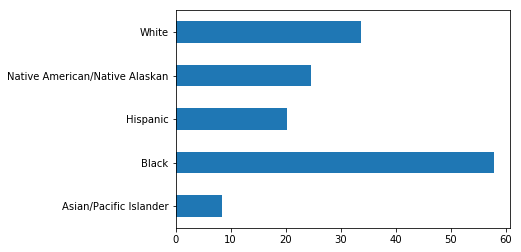

In [45]:
mapping = {
    'Asian/Pacific Islander': 15159516 + 674625,
    'Black': 40250635,
    'Hispanic': 44618105,
    'Native American/Native Alaskan': 3739506,
    'White': 197318956
}

race_counts = get_race_counts(data)

race_per_hundredk = {}
for key in race_counts:
    race_per_hundredk[key] = (float(race_counts[key]) / mapping[key]) * 100000
race_per_hundredk
pd.Series(race_per_hundredk).plot('barh')

In [39]:
intents = [l[3] for l in data]
races = [l[7] for l in data]
homicide_race_per_hundredk = {}
for i, race in enumerate(races):
    if intent[i] == 'Homicide':
        if race not in homicide_race_per_hundredk:
            homicide_race_per_hundredk[race] = 0
        homicide_race_per_hundredk[race] += 1

homicide_race_per_hundredk

    

{'Asian/Pacific Islander': 559,
 'Black': 19510,
 'Hispanic': 5634,
 'Native American/Native Alaskan': 326,
 'White': 9147}

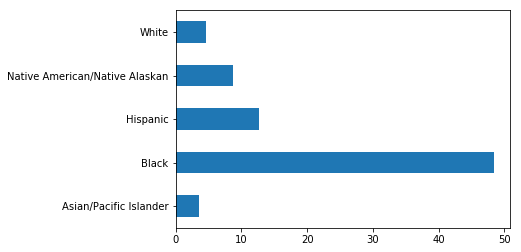

In [44]:
homicide_race_per_hundredk2 = {}
for key in homicide_race_per_hundredk:
    homicide_race_per_hundredk2[key] = (float(homicide_race_per_hundredk[key])/ mapping[key]) * 100000
homicide_race_per_hundredk2
pd.Series(homicide_race_per_hundredk2).plot('barh')

In [46]:
homicide_date_per_hundredk = {}
for i, date in enumerate(dates):
    if intent[i] == 'Homicide':
        if date not in homicide_date_per_hundredk:
            homicide_date_per_hundredk[date] = 0
        homicide_date_per_hundredk[date] += 1
        
homicide_date_per_hundredk

{datetime.datetime(2012, 1, 1, 0, 0): 972,
 datetime.datetime(2012, 2, 1, 0, 0): 749,
 datetime.datetime(2012, 3, 1, 0, 0): 966,
 datetime.datetime(2012, 4, 1, 0, 0): 999,
 datetime.datetime(2012, 5, 1, 0, 0): 1003,
 datetime.datetime(2012, 6, 1, 0, 0): 1044,
 datetime.datetime(2012, 7, 1, 0, 0): 1160,
 datetime.datetime(2012, 8, 1, 0, 0): 1090,
 datetime.datetime(2012, 9, 1, 0, 0): 1070,
 datetime.datetime(2012, 10, 1, 0, 0): 979,
 datetime.datetime(2012, 11, 1, 0, 0): 978,
 datetime.datetime(2012, 12, 1, 0, 0): 1083,
 datetime.datetime(2013, 1, 1, 0, 0): 986,
 datetime.datetime(2013, 2, 1, 0, 0): 721,
 datetime.datetime(2013, 3, 1, 0, 0): 923,
 datetime.datetime(2013, 4, 1, 0, 0): 916,
 datetime.datetime(2013, 5, 1, 0, 0): 955,
 datetime.datetime(2013, 6, 1, 0, 0): 1066,
 datetime.datetime(2013, 7, 1, 0, 0): 1137,
 datetime.datetime(2013, 8, 1, 0, 0): 1000,
 datetime.datetime(2013, 9, 1, 0, 0): 954,
 datetime.datetime(2013, 10, 1, 0, 0): 1009,
 datetime.datetime(2013, 11, 1, 0, 0): 9

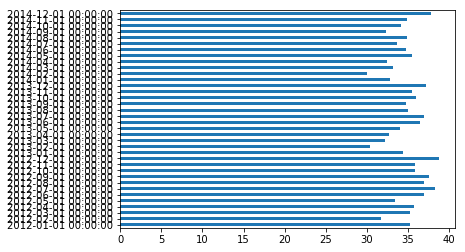

In [50]:
homicide_date_per_hundredk2 = {}
for key in homicide_date_per_hundredk:
    homicide_date_per_hundredk2[key] = (float(homicide_date_per_hundredk[key])/ date_counts[key]) * 100
homicide_date_per_hundredk2
pd.Series(homicide_date_per_hundredk2).plot('barh')